# <strong><font color="purple">Analise de dados e Construçaõ de códigos</font></strong>

## Importação dos dados



In [221]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

#loja = pd.read_csv(url)
#loja2 = pd.read_csv(url2)
#loja3 = pd.read_csv(url3)
#loja4 = pd.read_csv(url4)
#
#loja.head()

In [222]:
urls = [url,url2,url3,url4]
dados = pd.DataFrame()
for i in range(len(urls)):
  loja = pd.read_csv(urls[i])
  loja['loja'] = f'loja {i + 1}'
  dados = pd.concat([dados,loja])
dados.reset_index(drop=True,inplace=True)

In [223]:
dados.loja.value_counts()

,count
loja,
loja 1,2359
loja 2,2359
loja 3,2359
loja 4,2358


Temos quase a mesma cuantidade de dados por cada loja

In [224]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 9435 non-null   object 
 1   Categoria do Produto    9435 non-null   object 
 2   Preço                   9435 non-null   float64
 3   Frete                   9435 non-null   float64
 4   Data da Compra          9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Local da compra         9435 non-null   object 
 7   Avaliação da compra     9435 non-null   int64  
 8   Tipo de pagamento       9435 non-null   object 
 9   Quantidade de parcelas  9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  loja                    9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


In [225]:
dados.shape

(9435, 13)

Não temos dados nulos na base.

In [226]:
dados.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,loja 1


Precisamos botar a data no formato correto.

In [227]:
dados['Data da Compra'] = pd.to_datetime(dados['Data da Compra'])

/tmp/ipython-input-1860787142.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dados['Data da Compra'] = pd.to_datetime(dados['Data da Compra'])


In [228]:
print(f'Tem {len(dados.Produto.unique())} produtos diferentes.')

Tem 51 produtos diferentes.


In [229]:
resumo_categorias = dados['Categoria do Produto'].value_counts().sort_values(ascending=False)/dados['Categoria do Produto'].value_counts().sum()
display(resumo_categorias)

print(f"\n De forma geral as 4 categorias com maiores vendas são {', '.join(resumo_categorias.head(4).index)} que representam um {100*resumo_categorias.head(4).sum():.2f}% do total das vendas.")

,count
Categoria do Produto,
moveis,0.199894
eletronicos,0.187811
brinquedos,0.136725
eletrodomesticos,0.121781
esporte e lazer,0.117965
instrumentos musicais,0.079809
livros,0.078643
utilidades domesticas,0.077371



 De forma geral as 4 categorias com maiores vendas são moveis, eletronicos, brinquedos, eletrodomesticos que representam um 64.62% do total das vendas.


In [230]:
dados.describe().round(2)

,Preço,Frete,Data da Compra,Avaliação da compra,Quantidade de parcelas,lat,lon
count,9435.00,9435.00,9435,9435.00,9435.00,9435.00,9435.00
mean,622.31,33.17,2021-08-16 07:36:48.076311808,4.01,2.93,-20.53,-47.17
min,10.07,0.00,2020-01-01 00:00:00,1.00,1.00,-30.17,-70.55
25%,73.61,4.01,2020-10-27 00:00:00,3.00,1.00,-22.25,-48.79
50%,295.35,15.65,2021-08-22 00:00:00,5.00,1.00,-22.19,-48.79
75%,884.40,46.59,2022-06-04 12:00:00,5.00,4.00,-18.10,-44.38
max,3969.38,216.71,2023-03-31 00:00:00,5.00,24.00,1.99,-36.59
std,787.09,41.97,NaN,1.39,2.80,5.40,4.18


In [231]:
print(dados['Data da Compra'].min())
print(dados['Data da Compra'].max())

2020-01-01 00:00:00
2023-03-31 00:00:00


Para uma análise de evolução das vendas achamos interessante agrupar os dados por mes, ano e trimestre.

In [232]:
# Tratamento da data
dados['ano_mes'] = dados['Data da Compra'].dt.to_period('M')
dados['ano'] = dados['Data da Compra'].dt.to_period('Y')
dados['ano_trimestre'] = dados['Data da Compra'].dt.to_period('Q')
dados.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja,ano_mes,ano,ano_trimestre
0,Assistente virtual,eletronicos,219.08,9.249790,2021-01-16,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,loja 1,2021-01,2021,2021Q1
1,Mesa de jantar,moveis,256.35,11.234305,2022-05-18,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,loja 1,2022-05,2022,2022Q2
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,2021-03-15,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,loja 1,2021-03,2021,2021Q1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,2022-05-03,João Souza,RS,4,boleto,1,-30.17,-53.50,loja 1,2022-05,2022,2022Q2
4,Cadeira de escritório,moveis,446.99,26.964689,2020-11-07,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,loja 1,2020-11,2020,2020Q4


##1. Análise do faturamento


In [233]:
faturamento_loja = dados.groupby('loja')[['Preço','Frete']].sum().sort_values('Preço')
faturamento_loja

,Preço,Frete
loja,,
loja 4,1384497.58,73755.875119
loja 3,1464025.03,78022.661223
loja 2,1488459.06,79314.158013
loja 1,1534509.12,81837.967796


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

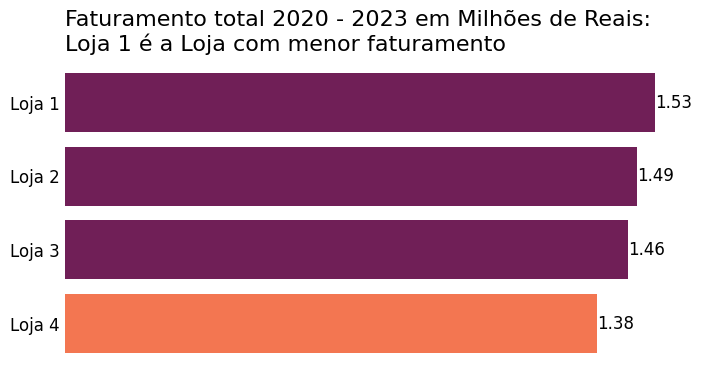

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns

def faturamento_total_loja():
  cores = []
  for loja in faturamento_loja.index:
    if faturamento_loja.loc[loja,'Preço'] == faturamento_loja['Preço'].min():
      cores.append(sns.color_palette("rocket")[4])
    else:
      cores.append(sns.color_palette("rocket")[1])

  fig, ax = plt.subplots(figsize=(8, 4))
  ax.barh([l.capitalize() for l in faturamento_loja.index], faturamento_loja['Preço'], color=cores)
  ax.set_title(f'Faturamento total {dados.ano.min()} - {dados.ano.max()} em Milhões de Reais: \n{loja.capitalize()} é a Loja com menor faturamento', fontsize=16, loc='left')
  ax.set_ylabel('')
  ax.yaxis.set_tick_params(labelsize=12)

  # Anotacoes
  for i,v in enumerate(faturamento_loja['Preço']):
    ax.text(v+20,i,str(round(v/(1e+6),2)),color='black',fontsize=12,ha='left',va='center')

  #Retirando caixa em volta e eixo y
  ax.set_frame_on(False)
  ax.axes.get_xaxis().set_visible(False)
  ax.tick_params(axis='both',which='both',length=0)

  return plt

faturamento_total_loja()

A loja 4 apresenta o menor faturamento total.

In [235]:
faturamento_trimestral = dados.groupby(['loja','ano_trimestre'])['Preço'].sum().rename('Faturamento Trimestral').to_frame().reset_index()
faturamento_trimestral['ano_trimestre'] = faturamento_trimestral['ano_trimestre'].astype(str)
faturamento_trimestral.head()

,loja,ano_trimestre,Faturamento Trimestral
0,loja 1,2020Q1,139601.26
1,loja 1,2020Q2,131394.38
2,loja 1,2020Q3,128607.25
3,loja 1,2020Q4,92308.62
4,loja 1,2021Q1,116693.56


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

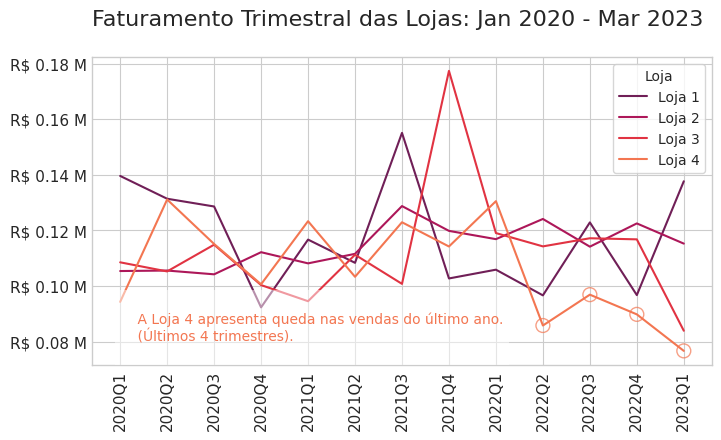

In [236]:
def faturamento_trimestral_lojas():
  with plt.style.context('seaborn-v0_8-whitegrid'):

    fig, ax = plt.subplots(figsize=(8, 4))
    ax = sns.lineplot(data=faturamento_trimestral,x='ano_trimestre',y='Faturamento Trimestral',hue='loja',palette=sns.color_palette("rocket")[1:5])
    ax.set_title('Faturamento Trimestral das Lojas: Jan 2020 - Mar 2023\n', fontsize=16, loc='left')
    ax.set_ylabel('', fontsize=12)
    ax.set_xlabel('', fontsize=12)
    ax.xaxis.set_tick_params(labelsize=11)
    ax.set_xticks(ax.get_xticks()) # para evitar o Warning
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

    # Formatando rótulos do eixo y em "R$ valor M"
    formatted_yticks = ['R$ {:.2f} M'.format(val / 1e6) for val in ax.get_yticks()]
    ax.set_yticks(ax.get_yticks()) # para evitar o Warning
    ax.set_yticklabels(formatted_yticks, fontsize=11)

    # Capitalizando legendas
    handles, labels = ax.get_legend_handles_labels()
    capitalized_labels = [label.capitalize() for label in labels]
    ax.legend(handles, capitalized_labels, title="Loja",frameon=True)

    # Adicionando texto
    texto = '''
    A Loja 4 apresenta queda nas vendas do último ano.
    (Últimos 4 trimestres).
    '''
    plt.text(
        0, 0.085e6, texto, ha='left', va='center', fontsize=10, color=sns.color_palette("rocket")[4]
        ,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none')
    )

    # Adicionar círculos numerados
    faturamento_trimestral_loja4 = faturamento_trimestral[faturamento_trimestral.loja == 'loja 4'].reset_index(drop=True)
    pares = [(a,b) for a,b in zip(faturamento_trimestral_loja4.index[9:],faturamento_trimestral_loja4['Faturamento Trimestral'][9:])]
    #for i, point in enumerate([(10, faturamento_trimestral.iloc[4]), (11, vendas_mensais.iloc[7]), (12, vendas_mensais.iloc[10]), (13, vendas_mensais.iloc[11])], start=1):
    for i, point in enumerate(pares, start=1):
        plt.scatter(point[0], point[1], s=100, color='none', edgecolors=sns.color_palette("rocket")[4], alpha=0.7)
        #plt.text(point[0] - 0.3, point[1] + 0.1, str(i), fontsize=12, color='red')

    return plt

faturamento_trimestral_lojas()

Quando separamos o faturamento por trimestres podemos observar que:

*   A loja 1 apresenta faturamentos sem uma tendencia marcada.
*   A loja 2 apresenta faturamento com menor variabilidad trimestral com respeito das outras lojas e uma tendencia crescente no faturamento.
*   A loja 3 apresenta faturamentos trimestrais com variabilidade alta e sem uma tendencia marcada.
*   A loja 4 apresenta uma queda significativa no faturamento no último ano.


## 2. Vendas por Categoria


Considerando as vendas de todas as lojas as 5 categorias com maior quantidade de produtos vendidos são:

In [237]:
import numpy as np

vendas_categoria = pd.DataFrame()
for i in range(1,5):
  vendas_categoria_loja = dados[dados.loja == 'loja '+str(i)].groupby('Categoria do Produto')['Categoria do Produto'].count().rename('Quantidade').to_frame().sort_values('Quantidade',ascending=False).reset_index()
  vendas_categoria_loja['% do Total'] = (vendas_categoria_loja['Quantidade'] / vendas_categoria_loja['Quantidade'].sum()) * 100
  vendas_categoria_loja['% do Total Cum.'] = np.cumsum(vendas_categoria_loja['% do Total'])
  vendas_categoria_loja['Loja'] = 'Loja '+str(i)
  vendas_categoria = pd.concat([vendas_categoria,vendas_categoria_loja])
  vendas_categoria = vendas_categoria.reset_index(drop=True)
display(vendas_categoria.head().round(2))

,Categoria do Produto,Quantidade,% do Total,% do Total Cum.,Loja
0,moveis,465,19.71,19.71,Loja 1
1,eletronicos,448,18.99,38.70,Loja 1
2,brinquedos,324,13.73,52.44,Loja 1
3,eletrodomesticos,312,13.23,65.66,Loja 1
4,esporte e lazer,284,12.04,77.70,Loja 1


A distribuição de quantidade de produtos vendidos por categoria por cada loja é a seguinte:

In [238]:
percentagem_categoria_loja = pd.DataFrame()
for i in range(1,5):
  percentagem_categoria_loja[f'Loja {i}'] = dados[dados.loja == 'loja '+str(i)].groupby('Categoria do Produto')['Categoria do Produto'].count().sort_values(ascending=False)
percentagem_categoria_loja = percentagem_categoria_loja/percentagem_categoria_loja.sum()
percentagem_categoria_loja.round(4)

,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
moveis,0.1971,0.1874,0.2115,0.2036
eletronicos,0.1899,0.1789,0.1912,0.1913
brinquedos,0.1373,0.1327,0.1335,0.1433
eletrodomesticos,0.1323,0.1293,0.1178,0.1077
esporte e lazer,0.1204,0.1166,0.1174,0.1175
instrumentos musicais,0.0772,0.0950,0.0750,0.0721
livros,0.0733,0.0835,0.0784,0.0793
utilidades domesticas,0.0725,0.0767,0.0750,0.0852


In [239]:
print(f'''
Podemos observar que a distribuição das vendas por categoria é muito similar em todas as lojas,
sendo {', '.join(percentagem_categoria_loja.head(4).index)} as categorias com maiores quantidade
de vendas em todas as Lojas.
''')


Podemos observar que a distribuição das vendas por categoria é muito similar em todas as lojas,
sendo moveis, eletronicos, brinquedos, eletrodomesticos as categorias com maiores quantidade
de vendas em todas as Lojas.



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

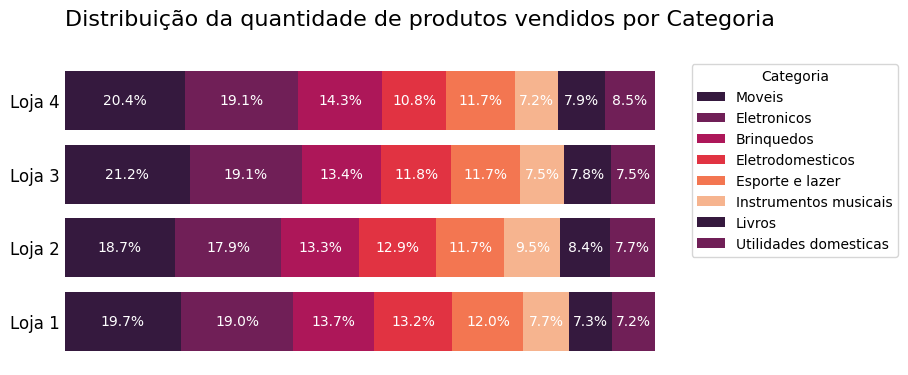

In [240]:
def distribuicao_quantidade_categoria():
  with sns.color_palette("rocket"):
    # Create a stacked bar plot
    fig, ax = plt.subplots(figsize=(8, 4))
    lojas = [c.capitalize() for c in percentagem_categoria_loja.columns]
    valores_acumulados = [0] * len(lojas)

    for categoria in percentagem_categoria_loja.index:
        valores = percentagem_categoria_loja.loc[categoria].values
        bars = ax.barh(lojas, valores, left=valores_acumulados, label=categoria)
        # Add valores in the middle of each bar
        for bar, valor, valor_acumulado in zip(bars, valores, valores_acumulados):
            ax.text(
                valor_acumulado + valor / 2,                # Middle of the bar
                bar.get_y() + 0.4,  # Center of the bar
                f'{valor*100:.1f}%',                        # Value to display
                ha='center', va='center', color='white', fontsize=10
            )
        valores_acumulados = [b + v for b, v in zip(valores_acumulados, valores)]

    # Customizando o gráfico
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title('Distribuição da quantidade de produtos vendidos por Categoria\n', fontsize=16,loc='left')
    ax.yaxis.set_tick_params(labelsize=12)

    #Retirando caixa em volta e eixo y
    ax.set_frame_on(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.tick_params(axis='both',which='both',length=0)

    # Capitalizando legendas
    handles, labels = ax.get_legend_handles_labels()
    capitalized_labels = [label.capitalize() for label in labels]
    plt.legend(handles, capitalized_labels, title="Categoria",loc='upper left', bbox_to_anchor=(1, 1))

    return plt

distribuicao_quantidade_categoria()

## 3. Média de Avaliação das Lojas

In [241]:
avaliacao_media_loja = dados.groupby('loja')[['Avaliação da compra','Frete']].mean().sort_values('Avaliação da compra')
avaliacao_media_loja.round(2)

,Avaliação da compra,Frete
loja,,
loja 1,3.98,34.69
loja 4,4.00,31.28
loja 2,4.04,33.62
loja 3,4.05,33.07


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

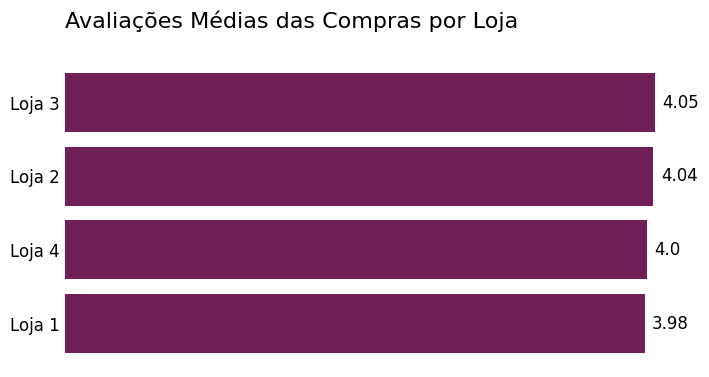

In [242]:
def avaliacao_media_loja():
  avaliacao_media_loja = dados.groupby('loja')[['Avaliação da compra','Frete']].mean().sort_values('Avaliação da compra')
  avaliacao_media_loja.round(2)

  fig, ax = plt.subplots(figsize=(8, 4))
  ax.barh([l.capitalize() for l in avaliacao_media_loja.index], avaliacao_media_loja['Avaliação da compra'], color=sns.color_palette("rocket")[1])
  ax.set_title(f'Avaliações Médias das Compras por Loja\n', fontsize=16, loc='left')
  ax.set_ylabel('')
  ax.yaxis.set_tick_params(labelsize=12)

  # Anotacoes
  for i,v in enumerate(avaliacao_media_loja['Avaliação da compra']):
    ax.text(v+0.05,i,str(round(v,2)),color='black',fontsize=12,ha='left',va='center')

  #Retirando caixa em volta e eixo y
  ax.set_frame_on(False)
  ax.axes.get_xaxis().set_visible(False)
  ax.tick_params(axis='both',which='both',length=0)

  return plt

avaliacao_media_loja()

As lojas que apresentam menores avaliações são as lojas 1 e 4, no entanto de forma geral as diferençãs entre avaliações médias parecem ser pequenas. Será que a distribuição das avaliações podem nos oferecer maior informação?

In [243]:
percentagem_avaliacao_loja = pd.DataFrame()
for i in range(1,5):
  percentagem_avaliacao_loja[f'Loja {i}'] = dados[dados.loja == 'loja '+str(i)].groupby('Avaliação da compra')['Avaliação da compra'].count().sort_index(ascending=False)
percentagem_avaliacao_loja = percentagem_avaliacao_loja/percentagem_avaliacao_loja.sum()
percentagem_avaliacao_loja.round(4)

,Loja 1,Loja 2,Loja 3,Loja 4
Avaliação da compra,,,,
5,0.5477,0.5519,0.5748,0.5513
4,0.1882,0.2043,0.1840,0.1921
3,0.0924,0.0886,0.0818,0.0891
2,0.0365,0.0394,0.0335,0.0360
1,0.1352,0.1157,0.1259,0.1315


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

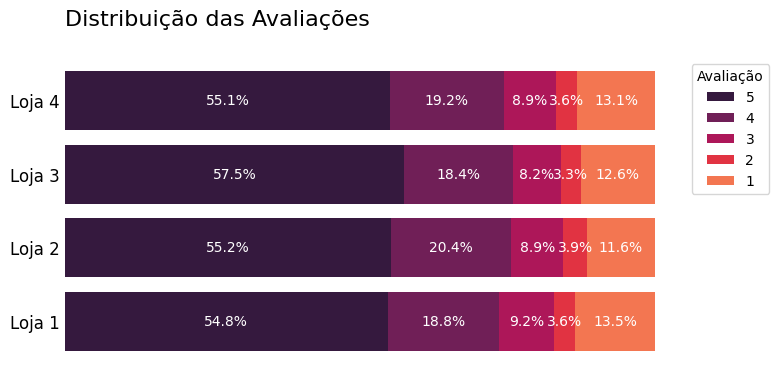

In [244]:
def distribuicao_avaliacao():
  with sns.color_palette("rocket"):
    # Create a stacked bar plot
    fig, ax = plt.subplots(figsize=(8, 4))
    lojas = [c.capitalize() for c in percentagem_avaliacao_loja.columns]
    valores_acumulados = [0] * len(lojas)

    for avaliacao in percentagem_avaliacao_loja.index:
        valores = percentagem_avaliacao_loja.loc[avaliacao].values
        bars = ax.barh(lojas, valores, left=valores_acumulados, label=avaliacao)
        # Add valores in the middle of each bar
        for bar, valor, valor_acumulado in zip(bars, valores, valores_acumulados):
            ax.text(
                valor_acumulado + valor / 2,                # Middle of the bar
                bar.get_y() + 0.4,  # Center of the bar
                f'{valor*100:.1f}%',                        # Value to display
                ha='center', va='center', color='white', fontsize=10
            )
        valores_acumulados = [b + v for b, v in zip(valores_acumulados, valores)]

    # Customizando o gráfico
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title('Distribuição das Avaliações\n', fontsize=16,loc='left')
    ax.yaxis.set_tick_params(labelsize=12)

    # Retirando caixa em volta e eixo y
    ax.set_frame_on(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.tick_params(axis='both',which='both',length=0)

    # Capitalizando legendas
    handles, labels = ax.get_legend_handles_labels()
    capitalized_labels = [label.capitalize() for label in labels]
    plt.legend(handles, capitalized_labels, title="Avaliação",loc='upper left', bbox_to_anchor=(1, 1))

    return plt

distribuicao_avaliacao()

O gráfico anterior mostra de forma mais completa como se distribuem as avaliações em cada uma das lojas, podemos observar que a Loja 3 tem as melhores avaliações se consideramos a avaliação 5 (Ótimo) ou 5 + 4 (Ótimo+Bom). Entretanto as outras 3 lojas tem uma distribuição das avaliações muito próxima sendo as lojas 1 e 4 as de peor performance tanto na Avaliação media global quanto se consideramos a proporção de avaliações 5 (Ótimo) ou 5+4 (ótimo+Bom) ou se consideramos a proporção de avaliações 1 (Pésimo).

In [245]:
avaliacao_trimestral = dados.groupby(['loja','ano_trimestre'])['Avaliação da compra'].mean().rename('Avaliacao Media Trimestral').to_frame().reset_index()
avaliacao_trimestral['ano_trimestre'] = avaliacao_trimestral['ano_trimestre'].astype(str)
avaliacao_trimestral.head()

,loja,ano_trimestre,Avaliacao Media Trimestral
0,loja 1,2020Q1,3.794118
1,loja 1,2020Q2,3.831325
2,loja 1,2020Q3,4.110497
3,loja 1,2020Q4,4.012195
4,loja 1,2021Q1,3.797814


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

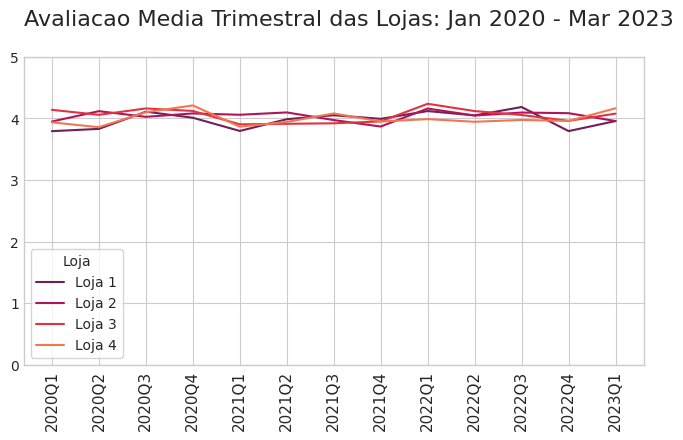

In [246]:
def avaliacao_media_trimestral():
  with plt.style.context('seaborn-v0_8-whitegrid'):

    fig, ax = plt.subplots(figsize=(8, 4))
    ax = sns.lineplot(data=avaliacao_trimestral,x='ano_trimestre',y='Avaliacao Media Trimestral',hue='loja',palette=sns.color_palette("rocket")[1:5])
    ax.set_title('Avaliacao Media Trimestral das Lojas: Jan 2020 - Mar 2023\n', fontsize=16, loc='left')
    ax.set_ylabel('', fontsize=12)
    ax.set_ylim(0,5)
    ax.set_xlabel('', fontsize=12)
    ax.xaxis.set_tick_params(labelsize=11)
    ax.set_xticks(ax.get_xticks()) # para evitar o Warning
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

    # Capitalizando legendas
    handles, labels = ax.get_legend_handles_labels()
    capitalized_labels = [label.capitalize() for label in labels]
    ax.legend(handles, capitalized_labels, title="Loja",frameon=True)

    return plt

avaliacao_media_trimestral()

A média das Avaliações por trimestre apresenta um comportamento estável no tempo.

## 4. Produtos Mais e Menos Vendidos

Calculamos a proporção de compras por produto em cada loja.

In [247]:
percentagem_produto_loja = pd.DataFrame(index=dados['Produto'].unique())
for i in range(1,5):
  percentagem_produto_loja[f'Loja {i}'] = dados[dados.loja == 'loja '+str(i)].groupby('Produto')['Produto'].count()
percentagem_produto_loja = percentagem_produto_loja/percentagem_produto_loja.sum()

A seguir os 5 produtos mas e menos vendidos em cada loja.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

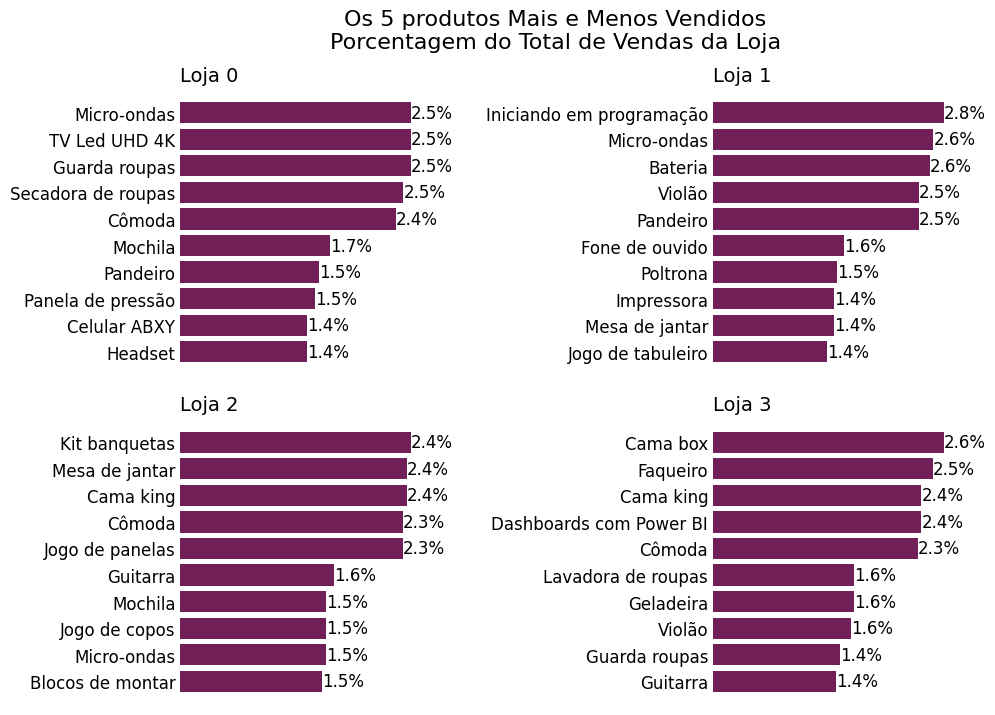

In [248]:
def produtos_mais_e_menos_vendidos():
  # Criar a figura e os subplots
  fig, axs = plt.subplots(2, 2, figsize=(10, 8))

  # Ajustar os espaçamentos entre os subplots
  plt.subplots_adjust(wspace=1.2, hspace=0.15)

  # Adicionando um título geral para os subplots
  fig.suptitle('Os 5 produtos Mais e Menos Vendidos\nPorcentagem do Total de Vendas da Loja\n', fontsize=16)

  #Loop para plotar e customizar os subplots
  for i, ax in enumerate(axs.flat):
    dados_i = percentagem_produto_loja[f'Loja {i+1}'].sort_values(ascending=True).iloc[[0,1,2,3,4,-5,-4,-3,-2,-1]]
    ax.barh(dados_i.index, dados_i, color=sns.color_palette("rocket")[1])
    ax.set_title(f'Loja {i}', loc='left', fontsize=14)
    ax.set_ylabel('', fontsize=14)
    ax.yaxis.set_tick_params(labelsize=12)
    ax.set_xlabel('', fontsize=14)

    # Anotacoes
    for i,v in enumerate(dados_i):
      ax.text(v*1.001,i,str(round(v*100,1))+'%',color='black',fontsize=12,ha='left',va='center')

    #Retirando caixa em volta e eixo y
    ax.set_frame_on(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.tick_params(axis='both',which='both',length=0)

  return plt

produtos_mais_e_menos_vendidos()

## 5. Frete Médio por Loja


In [249]:
frete_medio_loja = dados.groupby('loja')['Frete'].mean().sort_values()
frete_medio_loja.round(2)

,Frete
loja,
loja 4,31.28
loja 3,33.07
loja 2,33.62
loja 1,34.69


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

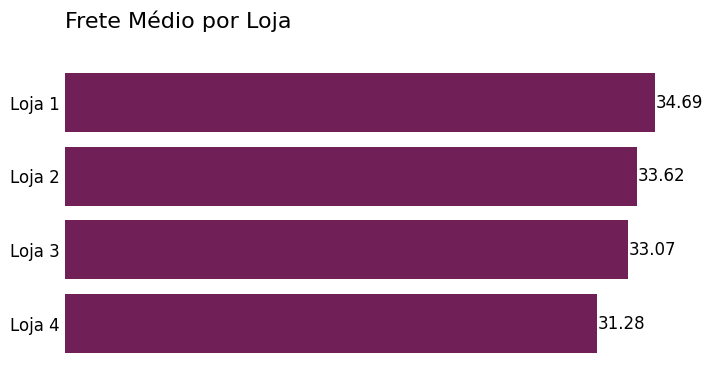

In [250]:
def frete_medio():
  fig, ax = plt.subplots(figsize=(8, 4))
  ax.barh([l.capitalize() for l in frete_medio_loja.index], frete_medio_loja, color=sns.color_palette("rocket")[1])
  ax.set_title(f'Frete Médio por Loja\n', fontsize=16, loc='left')
  ax.set_ylabel('')
  ax.yaxis.set_tick_params(labelsize=12)

  # Anotacoes
  for i,v in enumerate(frete_medio_loja):
    ax.text(v+0.05,i,str(round(v,2)),color='black',fontsize=12,ha='left',va='center')

  #Retirando caixa em volta e eixo y
  ax.set_frame_on(False)
  ax.axes.get_xaxis().set_visible(False)
  ax.tick_params(axis='both',which='both',length=0)

  return plt

frete_medio()

A informação anterior pode induzir a pensar que o frete na loja 4 é menor. No entanto, essa informação não considera o valor total da compra. Para uma análise mais completa podemos analisar a proporção do Valor Total da compra que representa o frete.

In [251]:
dados['Frete_por_Valor_Total'] = dados['Frete']/(dados['Frete'] + dados['Preço'])
dados.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja,ano_mes,ano,ano_trimestre,Frete_por_Valor_Total
0,Assistente virtual,eletronicos,219.08,9.249790,2021-01-16,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,loja 1,2021-01,2021,2021Q1,0.040511
1,Mesa de jantar,moveis,256.35,11.234305,2022-05-18,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,loja 1,2022-05,2022,2022Q2,0.041984
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,2021-03-15,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,loja 1,2021-03,2021,2021Q1,0.070694
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,2022-05-03,João Souza,RS,4,boleto,1,-30.17,-53.50,loja 1,2022-05,2022,2022Q2,0.051347
4,Cadeira de escritório,moveis,446.99,26.964689,2020-11-07,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,loja 1,2020-11,2020,2020Q4,0.056893


In [252]:
resumo_frete = dados.groupby('loja')['Frete_por_Valor_Total'].describe()
resumo_frete.index = [i.capitalize() for i in resumo_frete.index]
resumo_frete

,count,mean,std,min,25%,50%,75%,max
Loja 1,2359.0,0.050939,0.033480,0.0,0.045130,0.050877,0.054214,0.443193
Loja 2,2359.0,0.051453,0.035654,0.0,0.045372,0.050860,0.054702,0.436083
Loja 3,2359.0,0.050051,0.028312,0.0,0.045398,0.050921,0.054429,0.343825
Loja 4,2358.0,0.051323,0.031427,0.0,0.045561,0.050956,0.055265,0.345190


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

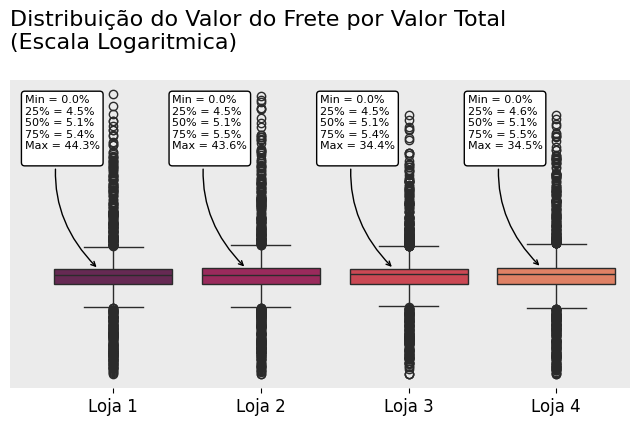

In [253]:
def distribuicao_frete_por_total():
  # Configurações do gráfico
  plt.figure(figsize=(8, 4))
  ax = plt.axes()
  ax.set_facecolor('#ebebeb')

  # Plotar o boxplot da distribuição da idade por sexo biológico
  sns.boxplot(data=dados,y='Frete_por_Valor_Total',x='loja',hue='loja',legend=False
              ,log_scale=True
              ,palette=sns.color_palette("rocket")[1:5],ax=ax
  )

  # Adicionar rótulos e título
  plt.title('Distribuição do Valor do Frete por Valor Total\n(Escala Logaritmica)\n', fontsize=16, loc='left')
  plt.xlabel('')
  plt.ylabel('Porcentagem do Valor Total (log))', fontsize=12)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
  ax.set_axisbelow(True)
  ax.xaxis.set_tick_params(labelsize=12)
  ax.set_xticks(ax.get_xticks()) # para evitar o Warning
  ax.set_xticklabels([l.get_text().title() for l in ax.get_xticklabels()])
  ax.set_xlim(-0.7,3.5)
  ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)
  ax.axes.get_yaxis().set_visible(False)

  ## Adicionar caixas de anotação
  resumo_frete = dados.groupby('loja')['Frete_por_Valor_Total'].describe()
  resumo_frete.index = [str(c).capitalize() for c in resumo_frete.index]
  for i, loja_nome in enumerate(resumo_frete.index):
    texto = f"Min = {resumo_frete.loc[loja_nome, 'min']*100:.1f}%\n" +\
    f"25% = {resumo_frete.loc[loja_nome, '25%']*100:.1f}%\n" +\
    f"50% = {resumo_frete.loc[loja_nome, '50%']*100:.1f}%\n" +\
    f"75% = {resumo_frete.loc[loja_nome, '75%']*100:.1f}%\n" +\
    f"Max = {resumo_frete.loc[loja_nome, 'max']*100:.1f}%\n"

    ax.annotate(texto, xy=(i-0.1, resumo_frete.loc[loja_nome, '75%']), xytext=(i-0.6, 0.2), fontsize=8,# color=AZUL_1,
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white'),
                arrowprops=dict(#facecolor=AZUL_1,
                                arrowstyle="->", connectionstyle="arc3,rad=0.3"))
  return plt

distribuicao_frete_por_total()

Desta forma podemos apreciar melhor como é a distribuição do valor do frete com respeito ao valor total do pedido. Podemos ver que as distribuições são muito similares, inclusive as médias por loja são iguais, sendo elas 5,1% do valor do Valor Total pago pelo cliente, o primeiro e terceiro quartil também são muito proximos.

## 6. Áreas com Maior Concentração de Vendas

In [254]:
import geopandas as gpd
from shapely.geometry import Point

# Criar GeoDataFrame com pontos
gdf_points = gpd.GeoDataFrame(
    dados
    ,geometry=gpd.points_from_xy(dados.lon, dados.lat)
    ,crs='EPSG:4326'
)

# Shapefile:
mapa_ufs = gpd.read_file('/content/BR_UF_2024.shp')[['SIGLA_UF', 'geometry']]

# Join espacial
gdf_points = gpd.sjoin(gdf_points, mapa_ufs, how='left', predicate='within')

# Agregar as vendas por UF e loja
agg = gdf_points.groupby(['loja', 'SIGLA_UF'])['Preço'].sum().reset_index()

/tmp/ipython-input-3933655033.py:15: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4674

  gdf_points = gpd.sjoin(gdf_points, mapa_ufs, how='left', predicate='within')


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

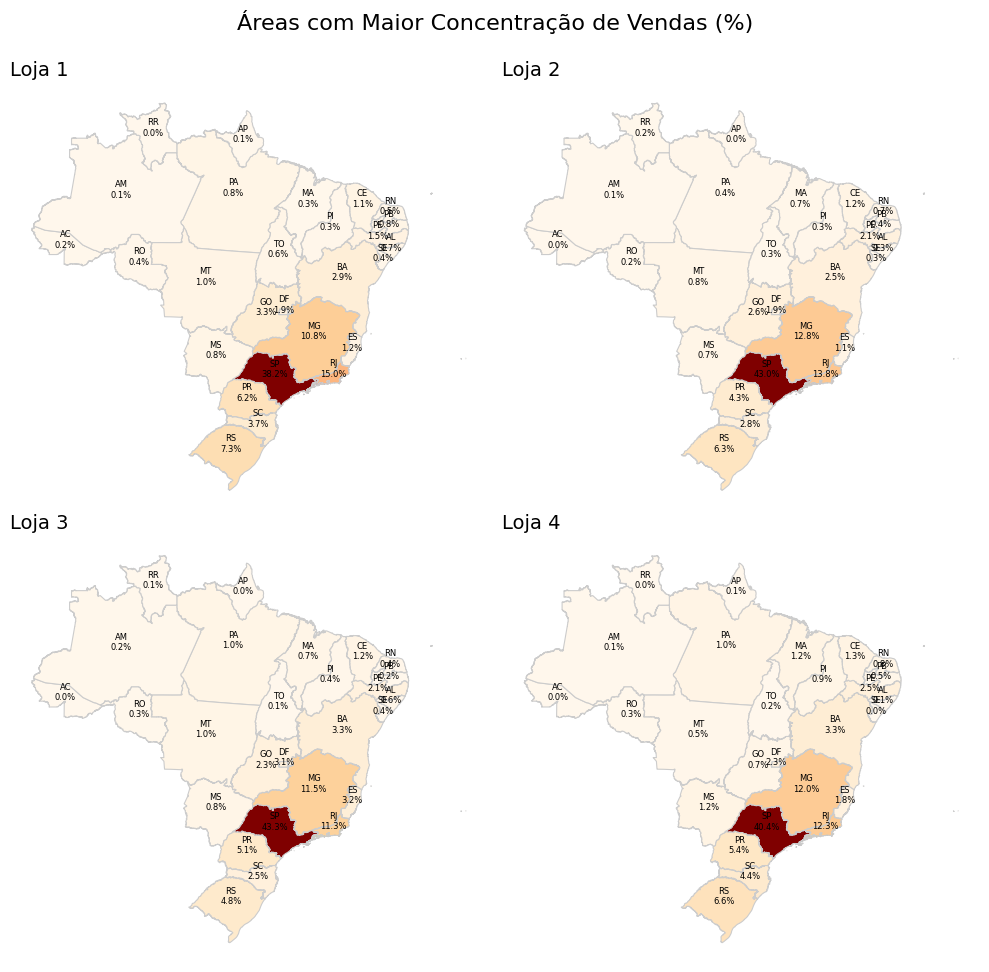

In [255]:
def concentracao_vendas():
  # Preparar os mapas para cada loja
  fig, axs = plt.subplots(2, 2, figsize=(10, 10))
  fig.suptitle('Áreas com Maior Concentração de Vendas (%)\n', fontsize=16)
  plt.subplots_adjust(wspace=0.2)
  lojas = agg['loja'].unique()

  for ax, loja in zip(axs.flatten(), lojas):
      # Dados da loja atual
      dados_loja = agg[agg['loja'] == loja]
      mapa_loja = mapa_ufs.merge(dados_loja, left_on='SIGLA_UF', right_on='SIGLA_UF', how='left')
      mapa_loja['vendas'] = mapa_loja['Preço'].fillna(0)
      mapa_loja['porcentagem_vendas'] = mapa_loja['vendas']/mapa_loja['vendas'].sum()

      # Plotar
      mapa_loja.plot(column='porcentagem_vendas',cmap='OrRd',linewidth=0.8,ax=ax,edgecolor='0.8',legend=False)
      ax.set_title(f'{loja.capitalize()}',loc='left', fontsize=14)
      ax.axis('off')

      # Adicionar os nomes das UFs no centroide do polígono
      for idx, row in mapa_loja.iterrows():
          centroid = row['geometry'].centroid
          ax.text(centroid.x, centroid.y, f"{row['SIGLA_UF']}\n{row['porcentagem_vendas']*100:.1f}%", horizontalalignment='center', fontsize=6)

  plt.tight_layout()
  return plt

concentracao_vendas()

A distribuição das vendas é bastante similar comparando as Lojas. O faturamento das lojas é maior nas regiões Sul e Sudeste, sendo o estado de Sao Paulo o estado que concentra a maior parte das vendas com ao redor de 40% em todas as lojas. Os estados de Rio de Janeiro, Minas Gerais, Paraná e Rio Grande do Sul seguem em importancia para o Faturamento.

In [256]:
# Salvando requirements
!pip freeze > requirements.txt

In [257]:
# Salvando gráficos
def salvar_grafico(grafico, nome):
    imagem = grafico()
    imagem.savefig(f'{nome}.png', bbox_inches='tight')
    imagem.close()

# Substitua as chamadas de função e nomes conforme necessário
salvar_grafico(faturamento_total_loja, 'grafico_faturamento_total_loja')
salvar_grafico(faturamento_trimestral_lojas, 'grafico_faturamento_trimestral_lojas')
salvar_grafico(distribuicao_quantidade_categoria, 'grafico_distribuicao_quantidade_categoria')
salvar_grafico(avaliacao_media_loja, 'grafico_avaliacao_media_loja')
salvar_grafico(distribuicao_avaliacao, 'grafico_distribuicao_avaliacao')
salvar_grafico(avaliacao_media_trimestral, 'grafico_avaliacao_media_trimestral')
salvar_grafico(produtos_mais_e_menos_vendidos, 'grafico_produtos_mais_e_menos_vendidos')
salvar_grafico(frete_medio, 'grafico_frete_medio')
salvar_grafico(distribuicao_frete_por_total, 'grafico_distribuicao_frete_por_total')
salvar_grafico(concentracao_vendas, 'grafico_concentracao_vendas')

# <strong><font color="purple">Relatorio Final</font></strong>

## Objetivo

O presente estudo tem como objetivo avaliar o desempenho das 4 lojas da rede Alura Store no periodo de Janeiro de 2020 até Março de 2023. E com isso determinar a loja com o menor desempenho.

Os fatores estudados para a avaliação das lojas são os seguintes:

1.  Faturamento.
2.  Categorias de produtos.
3.  Avaliações dos clientes.
4.  Produtos vendidos.
5.  Frete.
6.  Concentraçao das vendas por Estado.

## Fatores estudados

### 1. Faturamento

De forma geral a Loja 4 apresenta o menor faturamento de entre as 4 lojas. Além disso, quando agrupamos as vendas por trimestres pode se observar uma queda consistente de faturamento na Loja 4 no último ano.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

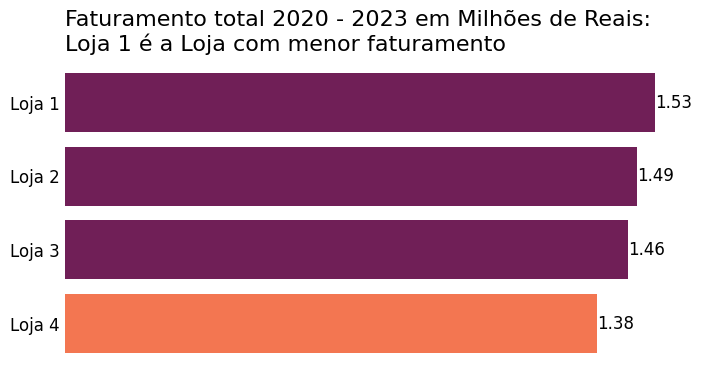

In [258]:
faturamento_total_loja()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

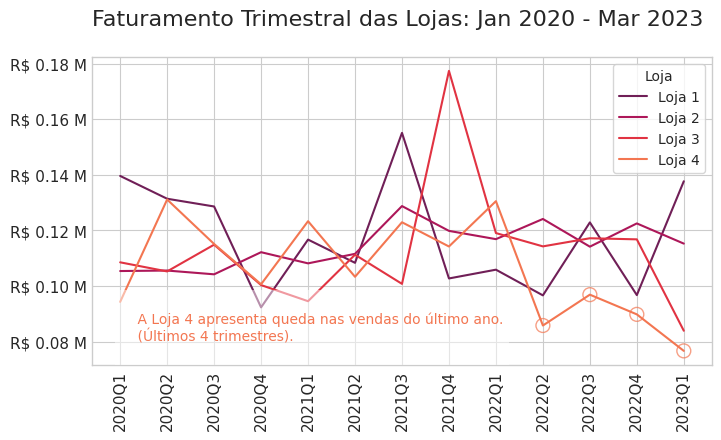

In [259]:
faturamento_trimestral_lojas()

### 2. Categorias de produtos

A distribuição da quantidade de produtos vendidos por Categoria é bastante similar em cada uma das lojas, o que significa que não temos alguma loja que se destaque pela venda de alguma Categoria em particular. Por isso, acreditamos que este criterio não é determinante para a escolha da loja que deve ser vendida.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

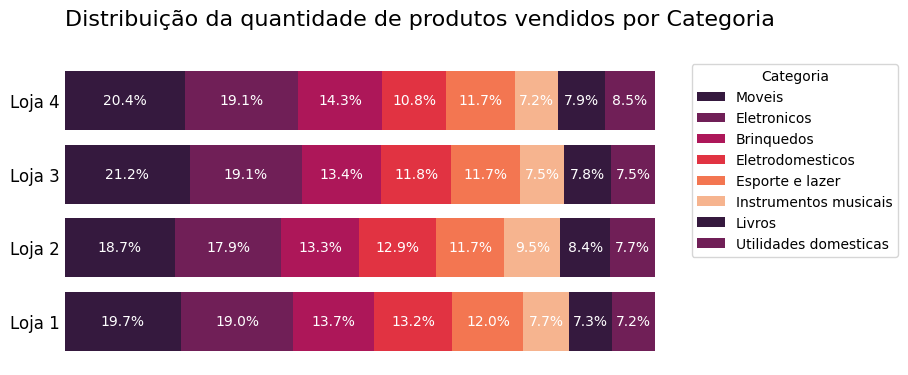

In [260]:
distribuicao_quantidade_categoria()

### 3. Avaliações dos clientes

As avaliações médias dos clientes em cada loja é muito próxima, estando todas ao redor de 4.

A distribuição das avaliações também é muito similar em cada loja. Se consideramos apenas as melhores avaliaçoes (4 e 5) observamos que as lojas 1 e 4 apresentam a menor proporçao de avaliações nestas categorias. Por outra parte, novamente, as lojas 1 e 4 apresentam a maior quantidade de avaliaçoes na categoria mais baixa (5).

Quando obtemos as avaliações médias em cada trimestre por cada uma das lojas podemos ver um comportamento estável (estacionario) da avaliação media.

Em conclusão, neste fator, as lojas 1 e 4 apresentam a menor performance, mas a diferença com as outras lojas não é marcante.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

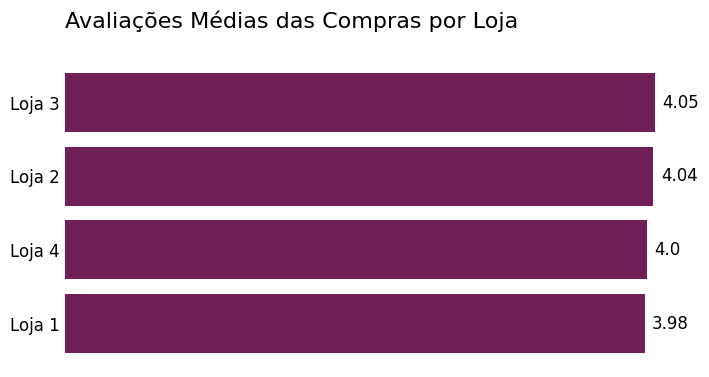

In [261]:
avaliacao_media_loja()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

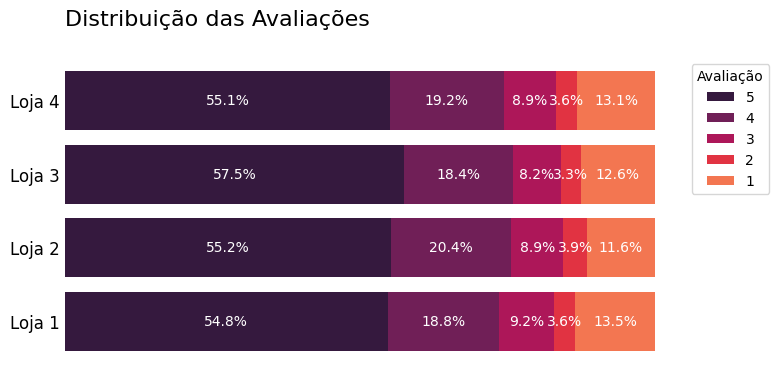

In [262]:
distribuicao_avaliacao()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

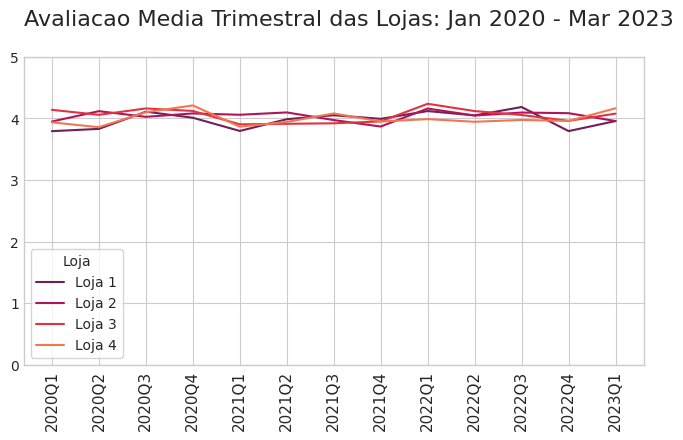

In [263]:
avaliacao_media_trimestral()

### 4. Produtos vendidos

Os produtos vendidos são muito diversos, a seguir se exibem os 5 produtos mais vendidos e 5 produtos menos vendidos em cada loja.

Podemos destacar nas vendas por produto que a diferencia entre o produto mais vendido e menos vendido não ultrapassa o 1,5%. Isto é, não temos uma diferençã muito grande entre o produto mais vendido e menos vendido em cada uma das 4 lojas.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

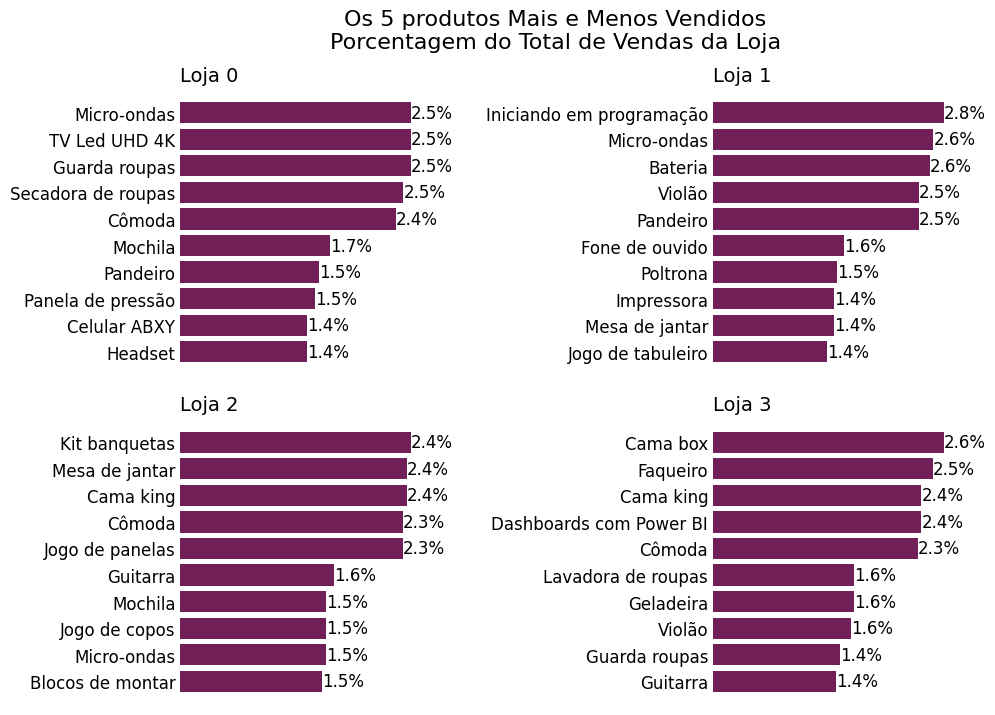

In [264]:
produtos_mais_e_menos_vendidos()

### 5. Frete


O frete medio por loja va de 31,3 até 34,7 reais.

No entanto, para compreender melhor a percepção do cliente do frete acreditamos que é apropriado ver que proporção representa o frete com respeito ao Valor Total pago pelo cliente. Nesse sentido, a distribuição do Valor do Frete pelo Valor Total mostra que esse valor tem uma distribuição bastante similar em cada loja com uma mediana de 5,1% em todas as lojas e valores dos Primeiro e Terceiro quartis que são quase os mesmos em cada loja.

Em resumo, acreditamos que a percepção do frete pelo cliente não é muito diferente em cada loja. Pelo que consideramos que esse fator não seja muito forte para nos ajudar a decidir qual loja deve ser vendida.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

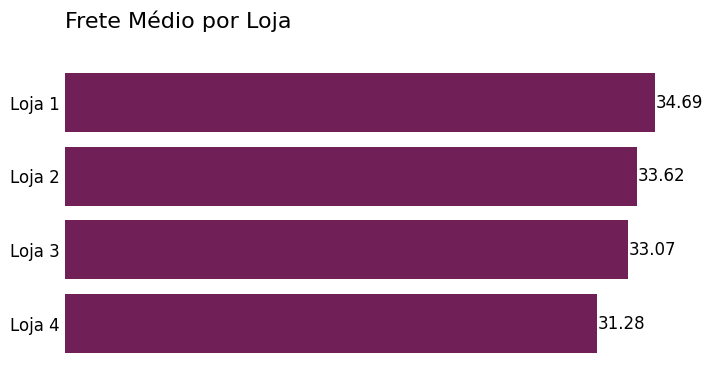

In [265]:
frete_medio()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

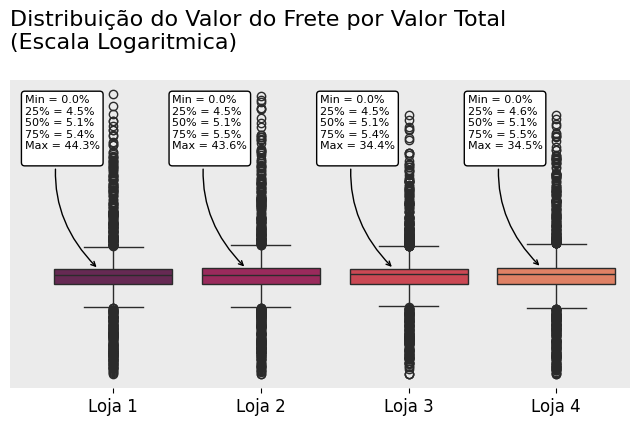

In [266]:
distribuicao_frete_por_total()

### 6. Concentraçao das vendas por Estado

A distribuição das vendas no Brasil para cada uma das lojas é bastante similar.

Em todas as lojas a venda se concentra nas regiões Sul e Sudeste, sendo o estado de São Paulo o estado que concentra a maior parte das vendas com ao redor de 40%. Os estados de Rio de Janeiro, Minas Gerais, Paraná e Rio Grande do Sul seguem em importancia segundo o nível de Vendas.

Devido a essa similaridade na distribuição territorial das vendas acreditamos que a venda de alguma loja terá quase o mesmo impacto na cobertura por Estado das vendas.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

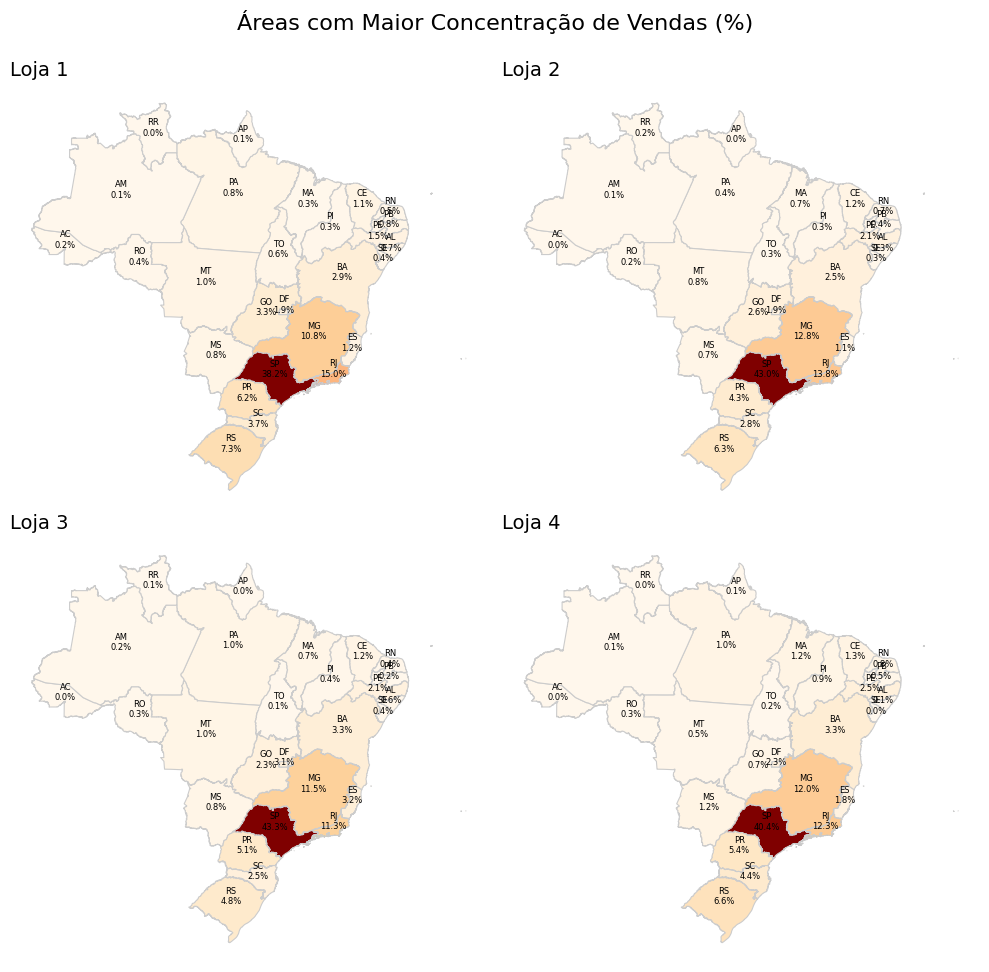

In [267]:
concentracao_vendas()

## Conclusão

Após a análise de todos os fatores estudados, entendemos que os fatores de Categorias de produtos, Avaliações dos Clientes, Produtos vendidos e Concentração de vendas não mostram diferenças significativas entre as lojas.

Por outra parte o fator Faturamento mostra que Loja 4 apresenta a pior performançe, com um menor faturamento total e uma queda consistente nas vendas no último ano.

Por tanto, recomendamos a venda da Loja 4.